In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
file_path="/content/drive/My Drive/Colab Notebooks/lung_cancer.csv"

In [ ]:
lc=pd.read_csv(file_path)

In [ ]:
lc.head()

,age,gender,education_years,income_level,smoker,smoking_years,cigarettes_per_day,pack_years,passive_smoking,air_pollution_index,...,bmi,oxygen_saturation,fev1_x10,crp_level,xray_abnormal,exercise_hours_per_week,diet_quality,alcohol_units_per_week,healthcare_access,lung_cancer_risk
0,60,1,20,2,1,16,15,12,0,71,...,20,94,29,6,1,5,4,13,3,1
1,53,0,12,4,0,0,0,0,1,66,...,25,96,35,4,0,5,2,0,3,0
2,62,1,15,3,1,9,29,13,1,69,...,23,95,29,9,1,1,4,2,1,1
3,73,1,12,3,0,0,0,0,0,47,...,18,96,32,0,0,0,3,10,4,0
4,52,1,13,1,0,0,0,0,0,94,...,16,97,36,8,0,6,2,9,2,0


In [ ]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   age                              5000 non-null   int64   
 1   gender                           5000 non-null   int64   
 2   education_years                  5000 non-null   int64   
 3   income_level                     5000 non-null   int64   
 4   smoker                           5000 non-null   int64   
 5   smoking_years                    5000 non-null   int64   
 6   cigarettes_per_day               5000 non-null   int64   
 7   pack_years                       5000 non-null   int64   
 8   passive_smoking                  5000 non-null   int64   
 9   air_pollution_index              5000 non-null   int64   
 10  occupational_exposure            5000 non-null   int64   
 11  radon_exposure                   5000 non-null   int64   
 12  family

### 1. Interaction Term: `cigarettes_per_day_x_pack_years`

Multiplying 'cigarettes_per_day' and 'pack_years' can create an interaction term that captures a combined effect. This new feature could represent the total cumulative exposure to smoking in a different way, potentially revealing more complex relationships with lung cancer risk than the individual features alone.

In [ ]:
lc['cigarettes_per_day_x_pack_years'] = lc['cigarettes_per_day'] * lc['pack_years']
print("New feature 'cigarettes_per_day_x_pack_years' created.")

New feature 'cigarettes_per_day_x_pack_years' created.


In [ ]:
lc.head()

,age,gender,education_years,income_level,smoker,smoking_years,cigarettes_per_day,pack_years,passive_smoking,air_pollution_index,...,exercise_hours_per_week,diet_quality,alcohol_units_per_week,healthcare_access,lung_cancer_risk,cigarettes_per_day_x_pack_years,cigarettes_per_day_squared,pack_years_squared,cigarettes_per_day_category,pack_years_category
0,60,1,20,2,1,16,15,12,0,71,...,5,4,13,3,1,180,225,144,Moderate Smoker,Medium Pack-Years
1,53,0,12,4,0,0,0,0,1,66,...,5,2,0,3,0,0,0,0,Non-smoker,Never Smoked
2,62,1,15,3,1,9,29,13,1,69,...,1,4,2,1,1,377,841,169,Heavy Smoker,Medium Pack-Years
3,73,1,12,3,0,0,0,0,0,47,...,0,3,10,4,0,0,0,0,Non-smoker,Never Smoked
4,52,1,13,1,0,0,0,0,0,94,...,6,2,9,2,0,0,0,0,Non-smoker,Never Smoked


In [ ]:
lc['age'].unique()

array([60, 53, 62, 73, 52, 64, 49, 61, 57, 32, 34, 48, 42, 58, 44, 38, 72,
       55, 37, 56, 41, 59, 47, 51, 77, 54, 40, 31, 39, 63, 46, 67, 33, 50,
       66, 71, 23, 45, 65, 84, 68, 81, 43, 36, 70, 35, 87, 90, 82, 80, 30,
       76, 18, 74, 29, 69, 79, 78, 27, 75, 25, 28, 22, 85, 86, 20, 83, 24,
       19, 26, 88, 21, 89])

In [ ]:
lc['cigarettes_per_day_category'].unique()

['Moderate Smoker', 'Non-smoker', 'Heavy Smoker', 'Light Smoker']
Categories (4, object): ['Non-smoker' < 'Light Smoker' < 'Moderate Smoker' < 'Heavy Smoker']

In [ ]:
lc['pack_years_category'].unique()

['Medium Pack-Years', 'Never Smoked', 'High Pack-Years', 'Low Pack-Years']
Categories (4, object): ['Never Smoked' < 'Low Pack-Years' < 'Medium Pack-Years' < 'High Pack-Years']

In [ ]:
lc['pack_years_category'].value_counts()

,count
pack_years_category,
Never Smoked,2905
Medium Pack-Years,860
High Pack-Years,858
Low Pack-Years,377


In [ ]:
lc['cigarettes_per_day_category'].value_counts()

,count
cigarettes_per_day_category,
Non-smoker,2821
Moderate Smoker,1053
Light Smoker,594
Heavy Smoker,532


In [ ]:
lc.isnull().sum()

,0
age,0
gender,0
education_years,0
income_level,0
smoker,0
smoking_years,0
cigarettes_per_day,0
pack_years,0
passive_smoking,0
air_pollution_index,0


In [ ]:
lc.head()

,age,gender,education_years,income_level,smoker,smoking_years,cigarettes_per_day,pack_years,passive_smoking,air_pollution_index,...,exercise_hours_per_week,diet_quality,alcohol_units_per_week,healthcare_access,lung_cancer_risk,cigarettes_per_day_x_pack_years,cigarettes_per_day_squared,pack_years_squared,cigarettes_per_day_category,pack_years_category
0,60,1,20,2,1,16,15,12,0,71,...,5,4,13,3,1,180,225,144,Moderate Smoker,Medium Pack-Years
1,53,0,12,4,0,0,0,0,1,66,...,5,2,0,3,0,0,0,0,Non-smoker,Never Smoked
2,62,1,15,3,1,9,29,13,1,69,...,1,4,2,1,1,377,841,169,Heavy Smoker,Medium Pack-Years
3,73,1,12,3,0,0,0,0,0,47,...,0,3,10,4,0,0,0,0,Non-smoker,Never Smoked
4,52,1,13,1,0,0,0,0,0,94,...,6,2,9,2,0,0,0,0,Non-smoker,Never Smoked


In [ ]:
grp=lc.groupby(lc['cigarettes_per_day_category'],as_index=False)['pack_years'].count().sort_values(by='cigarettes_per_day_category',ascending=True )


/tmp/ipython-input-2488146617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp=lc.groupby(lc['cigarettes_per_day_category'],as_index=False)['pack_years'].count().sort_values(by='cigarettes_per_day_category',ascending=True )


In [ ]:
grp

,cigarettes_per_day_category,pack_years
0,Non-smoker,2821
1,Light Smoker,594
2,Moderate Smoker,1053
3,Heavy Smoker,532


examine code to know distribution of lung cancer risk

/tmp/ipython-input-3664081017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lung_cancer_risk', data=lc, palette='viridis')


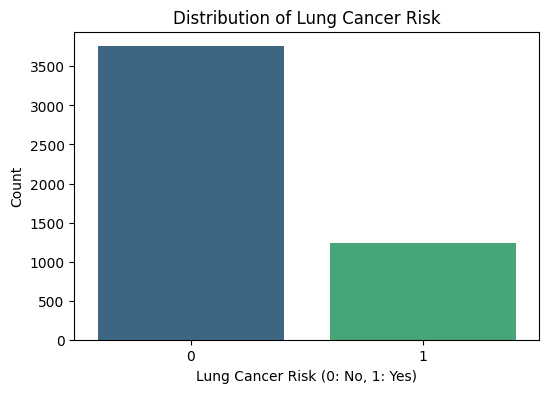

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='lung_cancer_risk', data=lc, palette='viridis')
plt.title('Distribution of Lung Cancer Risk')
plt.xlabel('Lung Cancer Risk (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

Next, let's examine how `cigarettes_per_day_category` influences `lung_cancer_risk`.

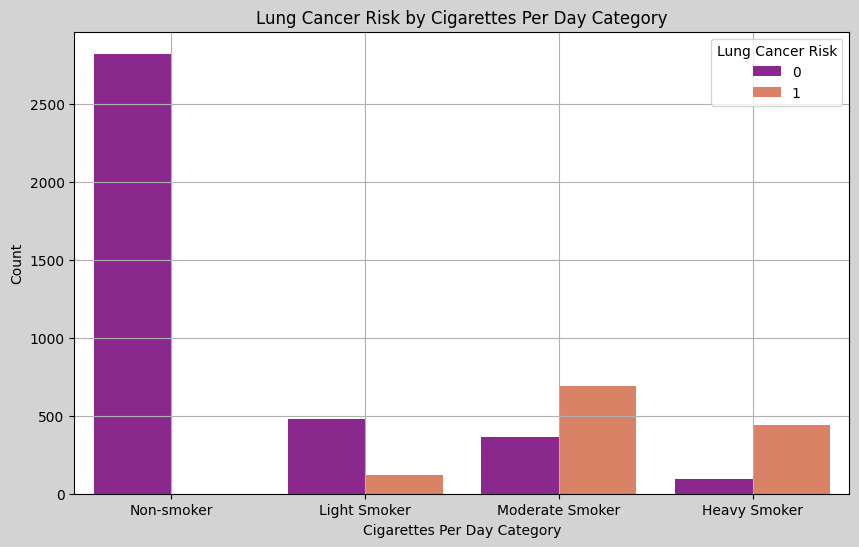

In [ ]:
# This plot is now part of the subplot above, so it can be removed or kept for individual viewing if needed.
# I will comment it out as the combined plot covers this analysis.
 plt.figure(figsize=(10, 6), facecolor='lightgray')
 sns.countplot(x='cigarettes_per_day_category', hue='lung_cancer_risk', data=lc, palette='plasma')
 plt.title('Lung Cancer Risk by Cigarettes Per Day Category')
 plt.xlabel('Cigarettes Per Day Category')
 plt.ylabel('Count')
 plt.legend(title='Lung Cancer Risk')
 plt.grid(True) # Added grid
 plt.show()

Now, let's explore the relationship between `pack_years_category` and `lung_cancer_risk`. 'pack per day ' , 'lung cancer risk' 2 graph

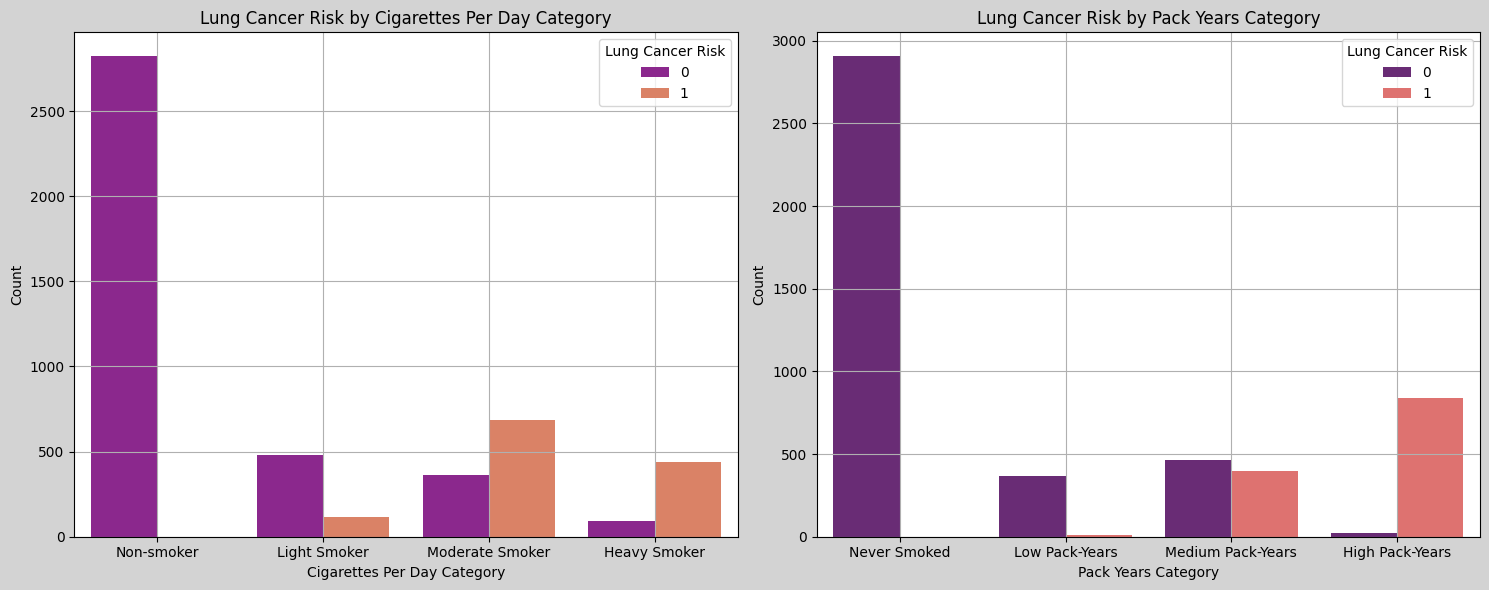

In [ ]:
plt.figure(figsize=(15, 6), facecolor='lightgray')

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.countplot(x='cigarettes_per_day_category', hue='lung_cancer_risk', data=lc, palette='plasma')
plt.title('Lung Cancer Risk by Cigarettes Per Day Category')
plt.xlabel('Cigarettes Per Day Category')
plt.ylabel('Count')
plt.legend(title='Lung Cancer Risk')
plt.grid(True)

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.countplot(x='pack_years_category', hue='lung_cancer_risk', data=lc, palette='magma')
plt.title('Lung Cancer Risk by Pack Years Category')
plt.xlabel('Pack Years Category')
plt.ylabel('Count')
plt.legend(title='Lung Cancer Risk')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

Finally, let's visualize the distribution of `age` for individuals with and without lung cancer risk.

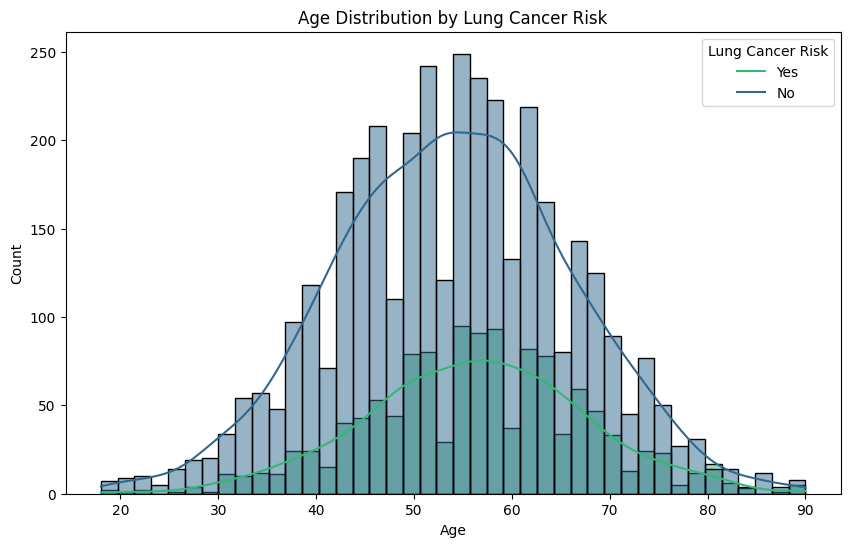

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=lc, x='age', hue='lung_cancer_risk', kde=True, palette='viridis')
plt.title('Age Distribution by Lung Cancer Risk')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Lung Cancer Risk', labels=['Yes', 'No'])
plt.show()

### 2. Polynomial Features

Creating polynomial features (e.g., squaring the existing features) can help capture non-linear relationships between the smoking habits and the target variable. For instance, the impact of smoking might not be linear with the number of cigarettes or pack-years.

In [ ]:
lc['cigarettes_per_day_squared'] = lc['cigarettes_per_day']**2
lc['pack_years_squared'] = lc['pack_years']**2
print("New features 'cigarettes_per_day_squared' and 'pack_years_squared' created.")

New features 'cigarettes_per_day_squared' and 'pack_years_squared' created.


### 3. Categorization (Binning)

Converting these numerical features into categorical bins can simplify the model and make it more robust to outliers. It can also help to identify specific thresholds where the risk changes significantly. For example, you could categorize 'cigarettes_per_day' into 'Non-smoker', 'Light Smoker', 'Moderate Smoker', 'Heavy Smoker'.

In [ ]:
# Binning 'cigarettes_per_day'
bins_cpd = [-1, 0, 10, 20, np.inf]
labels_cpd = ['Non-smoker', 'Light Smoker', 'Moderate Smoker', 'Heavy Smoker']
lc['cigarettes_per_day_category'] = pd.cut(lc['cigarettes_per_day'], bins=bins_cpd, labels=labels_cpd, right=True)

# Binning 'pack_years'
bins_py = [-1, 0, 5, 15, np.inf]
labels_py = ['Never Smoked', 'Low Pack-Years', 'Medium Pack-Years', 'High Pack-Years']
lc['pack_years_category'] = pd.cut(lc['pack_years'], bins=bins_py, labels=labels_py, right=True)

print("New categorical features 'cigarettes_per_day_category' and 'pack_years_category' created.")

New categorical features 'cigarettes_per_day_category' and 'pack_years_category' created.


### Displaying the DataFrame with new features

In [ ]:
bins_cpd

[-1, 0, 10, 20, inf]

In [ ]:
lc.head()

,age,gender,education_years,income_level,smoker,smoking_years,cigarettes_per_day,pack_years,passive_smoking,air_pollution_index,...,exercise_hours_per_week,diet_quality,alcohol_units_per_week,healthcare_access,lung_cancer_risk,cigarettes_per_day_x_pack_years,cigarettes_per_day_squared,pack_years_squared,cigarettes_per_day_category,pack_years_category
0,60,1,20,2,1,16,15,12,0,71,...,5,4,13,3,1,180,225,144,Moderate Smoker,Medium Pack-Years
1,53,0,12,4,0,0,0,0,1,66,...,5,2,0,3,0,0,0,0,Non-smoker,Never Smoked
2,62,1,15,3,1,9,29,13,1,69,...,1,4,2,1,1,377,841,169,Heavy Smoker,Medium Pack-Years
3,73,1,12,3,0,0,0,0,0,47,...,0,3,10,4,0,0,0,0,Non-smoker,Never Smoked
4,52,1,13,1,0,0,0,0,0,94,...,6,2,9,2,0,0,0,0,Non-smoker,Never Smoked


this visualize examine age distribution of individuals with and without lung cancer risk

/tmp/ipython-input-3678064270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lung_cancer_risk', y='age', data=lc, palette='viridis')


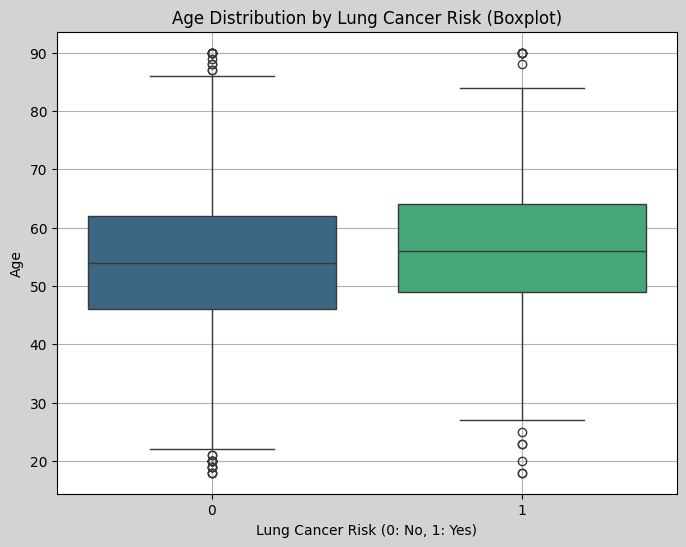

In [ ]:
plt.figure(figsize=(8, 6), facecolor='lightgray')
sns.boxplot(x='lung_cancer_risk', y='age', data=lc, palette='viridis')
plt.title('Age Distribution by Lung Cancer Risk (Boxplot)')
plt.xlabel('Lung Cancer Risk (0: No, 1: Yes)')
plt.ylabel('Age')
plt.grid(True)
plt.show()